# Imports

In [1]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree, datasets
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Data
## Input data - 1st example iris data

In [2]:
iris = datasets.load_iris()
X = iris.data[:,:2]  ## only takes the first two features.
y = iris.target
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.1, random_state = 100)

In [3]:
## create an instance of DecisionTreeClassifier and fit the data.
tree = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

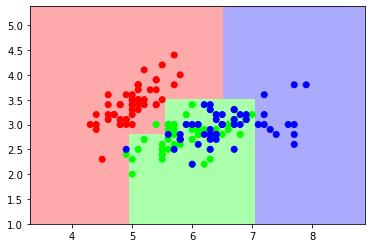

In [4]:
h = .02  ## step size in the mesh

## Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])



## Plot the decision boundary. For that, we will assign a color to each
## point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])

## Put the resulting areas into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

## Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [5]:
y_pred_en = tree.predict(X_test)
print("Accuracy is ", accuracy_score(y_test,y_pred_en)*100)

Accuracy is  66.66666666666666


# AdaBoost

In [6]:
## create an instance of AdaBoostClassifier and fit the data.
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

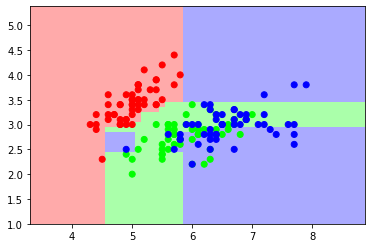

In [7]:
h = .02  ## step size in the mesh

## Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])



## Plot the decision boundary. For that, we will assign a color to each
## point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = ada.predict(np.c_[xx.ravel(), yy.ravel()])

## Put the resulting areas into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

## Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [8]:
y_pred_en = ada.predict(X_test)
print("Accuracy is ", accuracy_score(y_test,y_pred_en)*100)

Accuracy is  73.33333333333333


# RandomForest

In [9]:
## create an instance of RandomForestClassifier and fit the data.
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

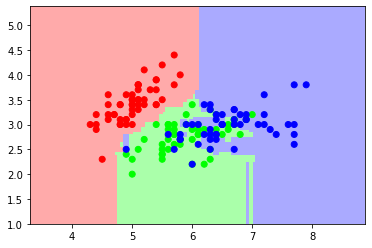

In [10]:
h = .02  ## step size in the mesh

## Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])



## Plot the decision boundary. For that, we will assign a color to each
## point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])

## Put the resulting areas into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

## Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [11]:
y_pred_en = rf.predict(X_test)
print("Accuracy is ", accuracy_score(y_test,y_pred_en)*100)

Accuracy is  86.66666666666667


# Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB
## create an instance of RandomForestClassifier and fit the data.
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

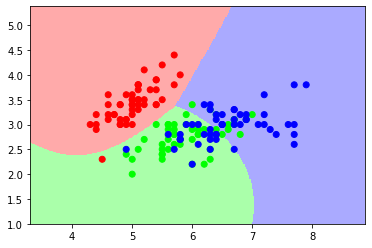

In [13]:
h = .02  ## step size in the mesh

## Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])



## Plot the decision boundary. For that, we will assign a color to each
## point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = nb.predict(np.c_[xx.ravel(), yy.ravel()])

## Put the resulting areas into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

## Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [14]:
y_pred_en = nb.predict(X_test)
print("Accuracy is ", accuracy_score(y_test,y_pred_en)*100)

Accuracy is  86.66666666666667
